## Some ideas for a numerical solution to the SPACE model: Stream Power with Alluvium Conservation and Entrainment
Running a time loop, seeing if things are realistic.
Basic equation set so far, for 1D. Sediment flux downstream:

$$\frac{dq_s}{dx} = K_s q S (1-\exp (-H/H_* ) ) + (1-F_f) K_r q S \exp (-H/H_*) -Vq_s/q$$

Rate of change of alluv thickness:

$$(1-\phi ) \frac{\partial H}{\partial t} = V q_s/q - K_s q S (1-\exp (-H/H_* ) )$$

Rate of change of rock elev:

$$\frac{\partial R}{\partial t} = U - K_r q S \exp (-H/H_* )$$

Local analytical solution for sediment flux within a cell:

$$q_s = \left( \frac{E_s+(1-F_f)E_r}{V/q} \right) \left( 1-\exp (-Vx/q) \right) + q_{s0} \exp (-Vx/q)$$

Try a little 1D version with some initial slope $S_0$:

In this version, q increases downstream.
 - time units are seconds
 - distance units are meters

In [36]:
import numpy as np
import matplotlib.pyplot as plt

num_nodes = 50
dx = 1.0
S0 = 0.01
V = 0.001 # settling velocity
Ff = 0.5
Ks = 0.1 # sed erodibility. not necessarily realistic
Kr = 0.0001
Hstar = 0.1 # sed thickness req'd for full entrainment potential. Not necessarily realistic.
dt = 10.0 # seconds
total_time = 500000.0
num_time_steps = int(total_time / dt)
U = 1.0e-7 # 1.0e-7 is still ~3m/year
r = 0.2 # some runoff factor

# array index
upper = np.arange(num_nodes-1)

# arrays
q = (np.arange(num_nodes) + 1)* dx * r # q = distance downstream * r
Voverq = V/q 
qs = np.zeros(num_nodes)
qs_in = np.zeros(num_nodes)
x = dx * np.arange(0, num_nodes)
H = np.zeros(num_nodes)
R = np.zeros(num_nodes)
z = (S0 * (num_nodes - 1) * dx - S0 * x)
R[:] = z

Time loop with a downstream distance loop inside (aaahh)

Time loop:

 - Each time step, first calculate S, Es and Er (functions of H)
 - Then, loop through the nodes from upstream to downstream calculating sediment flux.
 - Do a forward Euler solution for H
 - And rock uplift, R
 - And add R and H together to get elevation

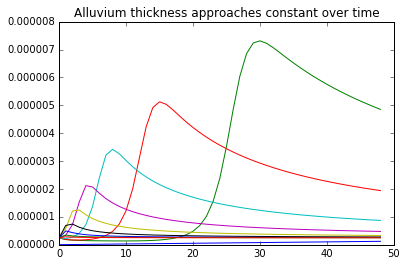

In [37]:
%matplotlib inline

for i in range(num_time_steps):
    S = (z[upper] - z[1:]) / dx
    
    Es = Ks * q[upper] * S * (1.0 - np.exp(-H[upper] / Hstar))
    
    Er = Kr * q[upper] * S * np.exp(-H[upper] / Hstar)
    
    for j in range(num_nodes - 1):
        qs[j] = (((Es[j]) + (1-Ff) * Er[j]) / Voverq[j]) * (1.0 - np.exp(-dx * Voverq[j])) + (qs_in[j] * np.exp(-dx * Voverq[j]))
        qs_in[j+1] = qs[j]
    
    H[upper] += dt * ((qs[upper] * Voverq[upper]) - Ks * q[upper] * S *(1.0 - np.exp(-H[upper]/Hstar)))
    
    R[upper] += dt * (U - Kr * q[upper] * S * (np.exp(-H[upper] / Hstar)))
    
    if i % 5000 == 0:
        plt.plot(H[:-1])
        plt.title('Alluvium thickness approaches constant over time')
    
    z = R + H 

[  2.50625729e-07   2.64348235e-07   2.59662317e-07   2.57285211e-07
   2.55852855e-07   2.54894547e-07   2.54207949e-07   2.53691623e-07
   2.53289083e-07   2.52966363e-07   2.52701808e-07   2.52480954e-07
   2.52293771e-07   2.52133086e-07   2.51993628e-07   2.51871441e-07
   2.51763494e-07   2.51667429e-07   2.51581380e-07   2.51503854e-07
   2.51433641e-07   2.51369750e-07   2.51311362e-07   2.51257792e-07
   2.51208466e-07   2.51162897e-07   2.51120672e-07   2.51081433e-07
   2.51044873e-07   2.51010727e-07   2.50978763e-07   2.50948776e-07
   2.50920589e-07   2.50894044e-07   2.50869001e-07   2.50845335e-07
   2.50822936e-07   2.50801704e-07   2.50781550e-07   2.50762394e-07
   2.50744163e-07   2.50726792e-07   2.50710220e-07   2.50694395e-07
   2.50679265e-07   2.50664787e-07   2.50650919e-07   2.50637623e-07
   2.50624864e-07   0.00000000e+00]


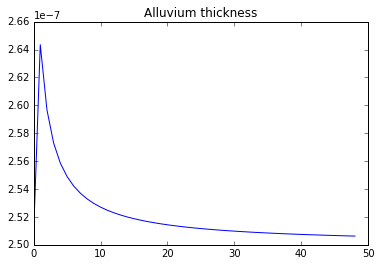

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(H[:-1])
plt.title('Alluvium thickness')
print H

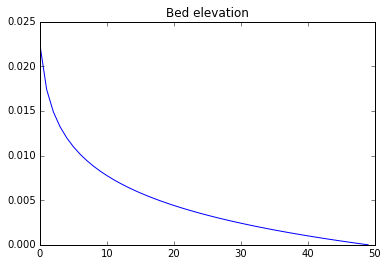

In [27]:
plt.plot(z)
plt.title('Bed elevation')

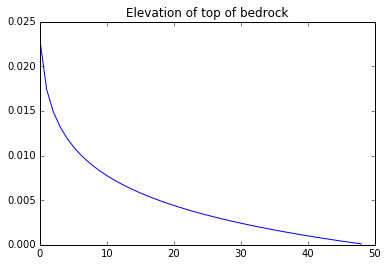

In [11]:
plt.plot(R[:-1])
plt.title('Elevation of top of bedrock')

1000-second time step doesn't work!

Below is the same model with a 100-second time step.

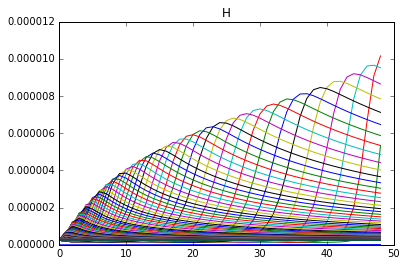

In [34]:
num_nodes = 50
dx = 1.0
S0 = 0.01
V = 0.001 # settling velocity
Ff = 0.5
Ks = 0.1 # sed erodibility. not necessarily realistic
Kr = 0.0001
Hstar = 0.1 # sed thickness req'd for full entrainment potential. Not necessarily realistic.
dt = 1.0 # seconds
total_time = 500000.0
num_time_steps = int(total_time / dt)
U = 1.0e-7 # 1.0e-7 is still ~3m/year
r = 0.2 # some runoff factor

# array index
upper = np.arange(num_nodes-1)

# arrays
q = (np.arange(num_nodes) + 1)* dx * r # q = distance downstream * r
Voverq = V/q 
qs = np.zeros(num_nodes)
qs_in = np.zeros(num_nodes)
x = dx * np.arange(0, num_nodes)
H = np.zeros(num_nodes)
R = np.zeros(num_nodes)
z = (S0 * (num_nodes - 1) * dx - S0 * x)
R[:] = z


%matplotlib inline

for i in range(num_time_steps):
    S = (z[upper] - z[1:]) / dx
    
    Es = Ks * q[upper] * S * (1.0 - np.exp(-H[upper] / Hstar))
    
    Er = Kr * q[upper] * S * np.exp(-H[upper] / Hstar)
    
    for j in range(num_nodes - 1):
        qs[j] = (((Es[j]) + (1-Ff) * Er[j]) / Voverq[j]) * (1.0 - np.exp(-dx * Voverq[j])) + (qs_in[j] * np.exp(-dx * Voverq[j]))
        qs_in[j+1] = qs[j]
    
    H[upper] += dt * ((qs[upper] * Voverq[upper]) - Ks * q[upper] * S *(1.0 - np.exp(-H[upper]/Hstar)))
    
    R[upper] += dt * (U - Kr * q[upper] * S * (np.exp(-H[upper] / Hstar)))
    
    if i % 5000 == 0:
        #plt.plot((qs[upper] * Voverq[upper]) - Ks * q[upper] * S *(1.0 - np.exp(-H[upper]/Hstar)))
        plt.plot(H[:-1])
        plt.title('H')
    
    #if i %5000 == 0:
     #  color=iter(cm.rainbow(np.linspace(0,1,colnum)))
        #c=next(color) 
        #plt.plot(H[:-1])
        #plt.title('Alluvium thickness approaches constant over time')
        
        #plt.figure(2)
        #plt.plot(R)
        #plt.title('Rock surface height over time')
    
    z = R + H 
    

Similar pattern to 100-sec time step over time, but the values are different and the final alluvium thickness is concave now (??)

[  2.50625729e-07   2.64348235e-07   2.59662317e-07   2.57285211e-07
   2.55852855e-07   2.54894547e-07   2.54207949e-07   2.53691623e-07
   2.53289083e-07   2.52966363e-07   2.52701808e-07   2.52480954e-07
   2.52293771e-07   2.52133086e-07   2.51993628e-07   2.51871441e-07
   2.51763494e-07   2.51667429e-07   2.51581380e-07   2.51503854e-07
   2.51433641e-07   2.51369750e-07   2.51311362e-07   2.51257792e-07
   2.51208466e-07   2.51162897e-07   2.51120672e-07   2.51081433e-07
   2.51044873e-07   2.51010727e-07   2.50978763e-07   2.50948776e-07
   2.50920589e-07   2.50894044e-07   2.50869001e-07   2.50845335e-07
   2.50822936e-07   2.50801704e-07   2.50781550e-07   2.50762394e-07
   2.50744163e-07   2.50726792e-07   2.50710220e-07   2.50694395e-07
   2.50679265e-07   2.50664787e-07   2.50650919e-07   2.50637623e-07
   2.50624864e-07   0.00000000e+00]


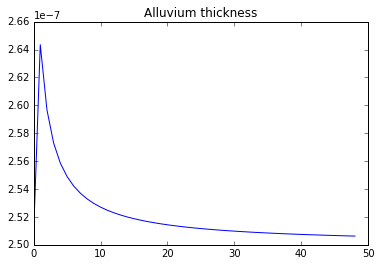

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(H[:-1])
plt.title('Alluvium thickness')
print H

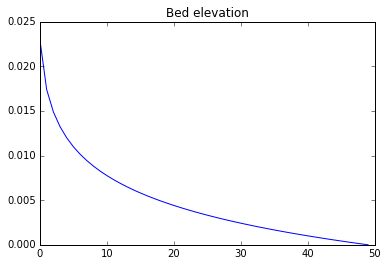

In [41]:
plt.plot(z)
plt.title('Bed elevation')

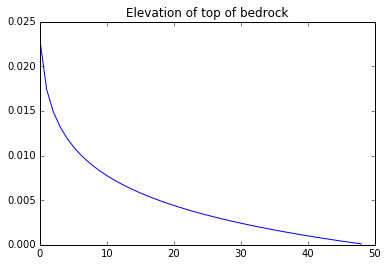

In [42]:
plt.plot(R[:-1])
plt.title('Elevation of top of bedrock')

In [48]:
# here is the analytical solution for the slope. Does it match?

Predicted_S = ((U * V * (1-Ff) / (r**2 * Ks) +  U / Kr * r) / x)
plt.plot(Predicted_S[1:])
plt.title('Predicted slope')
x

SyntaxError: invalid syntax (<ipython-input-48-7db9dcb82f43>, line 4)

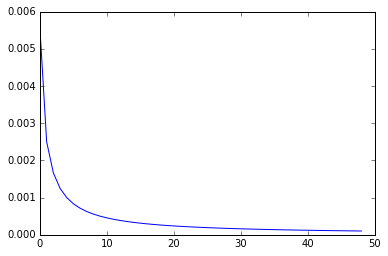

In [44]:
plt.plot(S)